In [7]:
! source ../venv/bin/activate

In [4]:
! pip install neptune-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.9/317.9 KB 4.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached bravado-11.0.3-py2.py3-none-any.whl (38 kB)
  Using cached future-0.18.2.tar.gz (829 kB)
  Preparing metadata (setup.py) ... done
  Using cached oauthlib-3.2.0-py3-none-any.whl (151 kB)
  Using cached PyJWT-2.4.0-py3-none-any.whl (18 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached GitPython-3.1.27-py3-none-any.whl (181 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.5/132.5 KB 3.2 MB/s eta 0:00:00a 0:00:01
  Using cached swagger_spec_validator-2.7.4-py2.py3-none-any.whl (27 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 2.4 MB/s eta 0:00:00
  Using cached jmespath-1.0.0-py3-none-any.whl (23 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 6.3 MB/s eta 0:00:0000:0100:01
  Using cached gitdb-4.0.9-py3-none-any.whl (63 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/7

In [8]:
import neptune.new as neptune

In [9]:
project = neptune.get_project(
            name="noahjadallah/TREC-Covid",
            api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJlNzgwNzhlNy1iMDVlLTQwNWUtYWJlYS04NWMxNjA0YmQ3ODAifQ==",
        )

https://app.neptune.ai/noahjadallah/TREC-Covid/
Remember to stop your project once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/project#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [10]:
df = project.fetch_runs_table().to_pandas()

In [11]:
project.stop()

Shutting down background jobs, please wait a moment...
Done!
Explore the metadata in the Neptune app:
https://app.neptune.ai/noahjadallah/TREC-Covid/metadata


In [13]:
df.columns

Index(['sys/creation_time', 'sys/description', 'sys/failed', 'sys/hostname',
       'sys/id', 'sys/modification_time', 'sys/monitoring_time', 'sys/name',
       'sys/owner', 'sys/ping_time', 'sys/running_time', 'sys/size',
       'sys/state', 'sys/tags', 'sys/trashed', 'eval/map/MAP@1',
       'eval/map/MAP@10', 'eval/map/MAP@20', 'eval/map/MAP@5',
       'eval/ndcg/NDCG@1', 'eval/ndcg/NDCG@10', 'eval/ndcg/NDCG@20',
       'eval/ndcg/NDCG@5', 'eval/precision/P@1', 'eval/precision/P@10',
       'eval/precision/P@20', 'eval/precision/P@5', 'eval/recall/Recall@1',
       'eval/recall/Recall@10', 'eval/recall/Recall@20',
       'eval/recall/Recall@5', 'parameters/bi-encoder_model',
       'parameters/cross_encoder', 'parameters/cross_encoder_top_k',
       'parameters/fuse_with_bm25', 'parameters/num_epochs',
       'parameters/pretrained_model', 'parameters/questions_subset',
       'parameters/sample_size', 'parameters/score_function',
       'source_code/entrypoint', 'source_code/git', 

In [14]:
df_eval_pre_trained = df[(df["parameters/score_function"] == "dot") & (df["parameters/fuse_with_bm25"] == False) & (df["parameters/cross_encoder"] == False)]#[["eval/ndcg/NDCG@10", "parameters/cross_encoder", "parameters/score_function"]]

In [15]:
df_eval_pre_trained

,sys/creation_time,sys/description,sys/failed,sys/hostname,sys/id,sys/modification_time,sys/monitoring_time,sys/name,sys/owner,sys/ping_time,...,parameters/score_function,source_code/entrypoint,source_code/git,monitoring/cpu,monitoring/gpu,monitoring/gpu_memory,monitoring/memory,monitoring/stderr,monitoring/stdout,monitoring/traceback
12,2022-05-29 10:58:11.064000+00:00,,False,4f5b00b65256,TREC-55,2022-05-29 17:30:50.728000+00:00,23557,fine_tune_msmarcoDistilBERT_with_genQ,noahjadallah,2022-05-29 17:30:50.728000+00:00,...,dot,main.py,8d36cc5eba6b8175efb4f1fd6595a83daeaa23df,36.4,74.0,10.895630,2.562347,\n,"Shutting down background jobs, please wait a m...",NaN
13,2022-05-28 20:00:47.971000+00:00,,False,0bef9de22fce,TREC-54,2022-05-29 00:29:47.090000+00:00,16137,fine_tune_distilBERT_with_genQ,noahjadallah,2022-05-29 00:29:47.090000+00:00,...,dot,main.py,8d36cc5eba6b8175efb4f1fd6595a83daeaa23df,34.1,93.0,7.227661,5.170437,\n,"Shutting down background jobs, please wait a m...",NaN
14,2022-05-28 19:30:57.243000+00:00,,False,0bef9de22fce,TREC-53,2022-05-28 19:53:52.592000+00:00,1375,test_bioClinicalBERT_with_genQ,noahjadallah,2022-05-28 19:53:52.592000+00:00,...,dot,main.py,8d36cc5eba6b8175efb4f1fd6595a83daeaa23df,30.1,94.0,2.239380,3.083275,\n,"Shutting down background jobs, please wait a m...",NaN
16,2022-05-27 19:08:30.729000+00:00,,False,2dd4e854fd03,TREC-51,2022-05-28 03:56:09.048000+00:00,31655,fine_tune_biomedPubMedBERT_with_genQ,noahjadallah,2022-05-28 03:56:09.048000+00:00,...,dot,main.py,8d36cc5eba6b8175efb4f1fd6595a83daeaa23df,33.5,89.0,12.487427,2.580414,\n,"Shutting down background jobs, please wait a m...",NaN
17,2022-05-27 12:43:36.563000+00:00,,False,c994dbc822cf,TREC-48,2022-05-27 19:04:56.402000+00:00,22877,fine_tune_biobert_with_genQ,noahjadallah,2022-05-27 19:04:56.402000+00:00,...,dot,main.py,dcef77edd4dceccf142a17cbd1250a971511ee04,32.3,98.0,12.890625,3.170715,\n,"Shutting down background jobs, please wait a m...",NaN
15,2022-05-28 10:43:15.869000+00:00,,False,4ddb5839fb91,TREC-52,2022-05-28 19:27:02.153000+00:00,31423,fine_tune_bioClinicalBERT_with_genQ,noahjadallah,2022-05-28 19:27:02.153000+00:00,...,dot,main.py,8d36cc5eba6b8175efb4f1fd6595a83daeaa23df,31.8,100.0,12.364380,2.500767,"\rBatches: 35% 1080/3125 [03:11<06:02, 5.64i...",\n,NaN


In [16]:
df_eval_pre_trained['parameters/pretrained_model'].values

array(['None', 'distilbert-base-uncased',
       'emilyalsentzer/Bio_ClinicalBERT',
       'microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext',
       'dmis-lab/biobert-v1.1', 'emilyalsentzer/Bio_ClinicalBERT'],
      dtype=object)

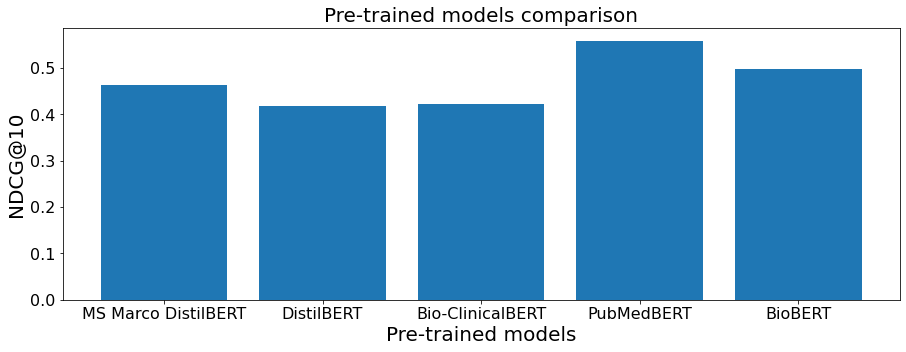

In [35]:
import matplotlib.pyplot as plt

models = ["MS Marco DistilBERT", "DistilBERT", "Bio-ClinicalBERT", "PubMedBERT", "BioBERT", "Bio-ClinicalBERT"]
plt.rcParams['font.size'] = '16'
plt.figure(figsize=(15, 5))
plt.bar(models, df_eval_pre_trained['eval/ndcg/NDCG@10'].values)
plt.title('Pre-trained models comparison', fontsize=20)
plt.xlabel('Pre-trained models', fontsize=20)
plt.ylabel('NDCG@10', fontsize=20)
plt.show()

In [36]:
import matplotlib.pyplot as plt

def plot_performance(model_names, performance, figsize=(15, 5), title=None, xlabel=None, ylabel='NDCG@10'):
    model_names = [x for _, x in sorted(zip(performance, model_names), key=lambda pair: -pair[0])]
    performance = sorted(performance, reverse=True)
    plt.rcParams['font.size'] = '16'
    plt.figure(figsize=figsize)
    plt.bar(model_names, performance)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


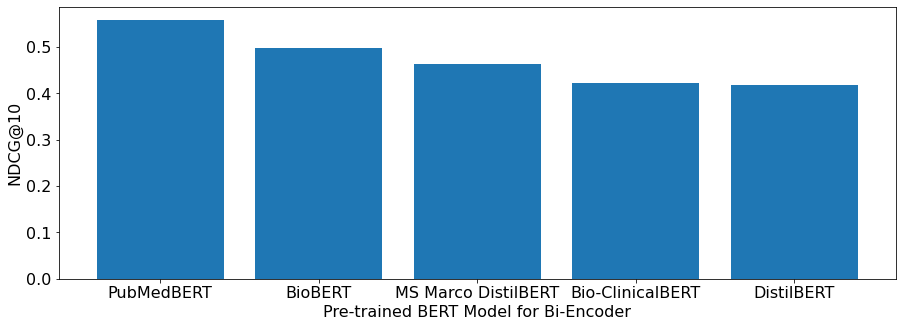

In [37]:
plot_performance(models, df_eval_pre_trained['eval/ndcg/NDCG@10'].values, xlabel="Pre-trained BERT Model for Bi-Encoder")

In [38]:
df_biobert_scoref = df[(df["sys/name"] == "test_biobert_with_genQ_cos_sim") | (df["sys/name"] == "fine_tune_biobert_with_genQ")]

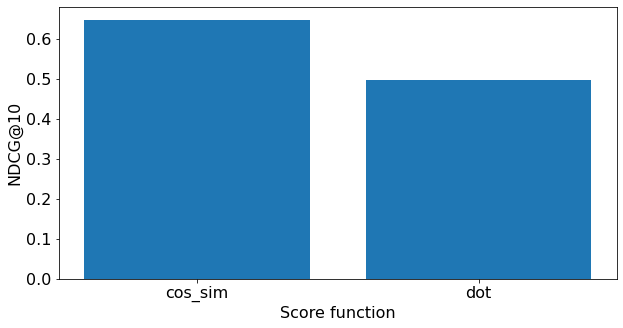

In [39]:
plot_performance(df_biobert_scoref["parameters/score_function"].values, df_biobert_scoref['eval/ndcg/NDCG@10'].values, figsize=(10, 5), xlabel="Score function")

In [26]:
df_pubmedbert_scoref = df[(df["sys/name"] == "fine_tune_biomedPubMedBERT_with_genQ") | (df["sys/name"] == "test_biomedPubMedBERT_with_genQ_cos_sim")]

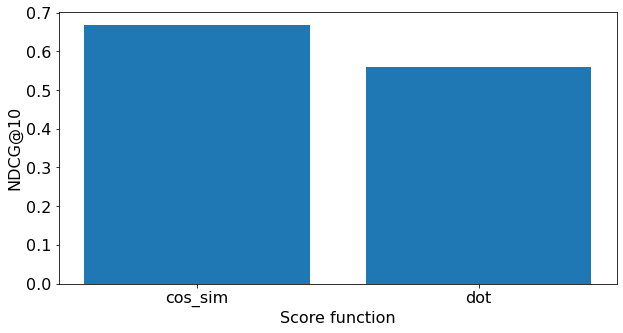

In [27]:
plot_performance(df_pubmedbert_scoref["parameters/score_function"].values, df_pubmedbert_scoref['eval/ndcg/NDCG@10'].values, figsize=(10, 5), xlabel="Score function")

In [28]:
df

,sys/creation_time,sys/description,sys/failed,sys/hostname,sys/id,sys/modification_time,sys/monitoring_time,sys/name,sys/owner,sys/ping_time,...,parameters/score_function,source_code/entrypoint,source_code/git,monitoring/cpu,monitoring/gpu,monitoring/gpu_memory,monitoring/memory,monitoring/stderr,monitoring/stdout,monitoring/traceback
0,2022-06-24 13:56:26.982000+00:00,,False,763d11dd79f7,TREC-69,2022-06-24 14:41:20.973000+00:00,2693,save_results,noahjadallah,2022-06-24 14:41:20.973000+00:00,...,cos_sim,main.py,84654b629f78cf6262fc2c029058ae910831c52e,26.4,100.0,6.886719,3.787926,\n,"Shutting down background jobs, please wait a m...",NaN
2,2022-06-04 15:54:11.291000+00:00,,False,b612c5d95408,TREC-66,2022-06-04 16:17:33.766000+00:00,1402,test_biobert_with_genQ_cos_sim_ce_fuse,noahjadallah,2022-06-04 16:17:33.766000+00:00,...,cos_sim,main.py,8d36cc5eba6b8175efb4f1fd6595a83daeaa23df,27.2,100.0,6.534302,3.208988,\n,"Shutting down background jobs, please wait a m...",NaN
3,2022-06-04 15:31:03.313000+00:00,,False,b612c5d95408,TREC-65,2022-06-04 15:54:02.633000+00:00,1379,test_biobert_with_genQ_cos_sim_ce,noahjadallah,2022-06-04 15:54:02.633000+00:00,...,cos_sim,main.py,8d36cc5eba6b8175efb4f1fd6595a83daeaa23df,22.7,100.0,6.534302,3.185062,\n,"Shutting down background jobs, please wait a m...",NaN
4,2022-06-04 15:07:46.682000+00:00,,False,b612c5d95408,TREC-64,2022-06-04 15:30:54.702000+00:00,1388,test_biobert_with_genQ_cos_sim,noahjadallah,2022-06-04 15:30:54.702000+00:00,...,cos_sim,main.py,8d36cc5eba6b8175efb4f1fd6595a83daeaa23df,28.9,87.0,2.221802,3.160877,\n,"Shutting down background jobs, please wait a m...",NaN
5,2022-06-04 14:44:20.181000+00:00,,False,b612c5d95408,TREC-63,2022-06-04 15:07:37.261000+00:00,1397,test_biobert_with_genQ_dot_ce_fuse,noahjadallah,2022-06-04 15:07:37.261000+00:00,...,dot,main.py,8d36cc5eba6b8175efb4f1fd6595a83daeaa23df,27.8,100.0,6.551880,3.156494,\n,"Shutting down background jobs, please wait a m...",NaN
6,2022-06-04 14:21:04.392000+00:00,,False,b612c5d95408,TREC-62,2022-06-04 14:44:11.130000+00:00,1386,test_biobert_with_genQ_dot_ce,noahjadallah,2022-06-04 14:44:11.130000+00:00,...,dot,main.py,8d36cc5eba6b8175efb4f1fd6595a83daeaa23df,27.3,100.0,9.891724,3.175449,\n,"Shutting down background jobs, please wait a m...",NaN
7,2022-06-04 13:59:17.578000+00:00,,False,b612c5d95408,TREC-61,2022-06-04 14:20:54.382000+00:00,1296,test_biomedPubMedBERT_with_genQ_dot_ce_fuse,noahjadallah,2022-06-04 14:20:54.382000+00:00,...,dot,main.py,8d36cc5eba6b8175efb4f1fd6595a83daeaa23df,27.7,99.0,6.579224,3.180237,\n,"Shutting down background jobs, please wait a m...",NaN
8,2022-06-04 13:36:53.857000+00:00,,False,b612c5d95408,TREC-60,2022-06-04 13:59:06.794000+00:00,1332,test_biomedPubMedBERT_with_genQ_dot_ce,noahjadallah,2022-06-04 13:59:06.794000+00:00,...,dot,main.py,8d36cc5eba6b8175efb4f1fd6595a83daeaa23df,26.9,98.0,6.579224,3.177742,\n,"Shutting down background jobs, please wait a m...",NaN
9,2022-06-03 12:25:43.965000+00:00,,False,7323cd71a09e,TREC-59,2022-06-03 13:09:32.541000+00:00,2628,test_biomedPubMedBERT_with_genQ_cos_sim_ce_fuse,noahjadallah,2022-06-03 13:09:32.541000+00:00,...,cos_sim,main.py,8d36cc5eba6b8175efb4f1fd6595a83daeaa23df,30.7,100.0,6.898438,3.781139,\n,"Shutting down background jobs, please wait a m...",NaN
10,2022-06-03 11:27:49.935000+00:00,,False,7323cd71a09e,TREC-58,2022-06-03 12:23:23.414000+00:00,2663,test_biomedPubMedBERT_with_genQ_cos_sim_ce,noahjadallah,2022-06-03 12:12:13.392000+00:00,...,cos_sim,main.py,8d36cc5eba6b8175efb4f1fd6595a83daeaa23df,26.3,100.0,6.898438,3.746880,\n,"Shutting down background jobs, please wait a m...",NaN


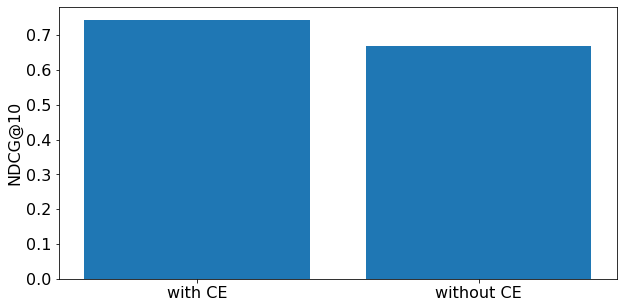

In [29]:
plot_performance(["without CE", "with CE"], [0.66881, 0.74384], figsize=(10, 5))

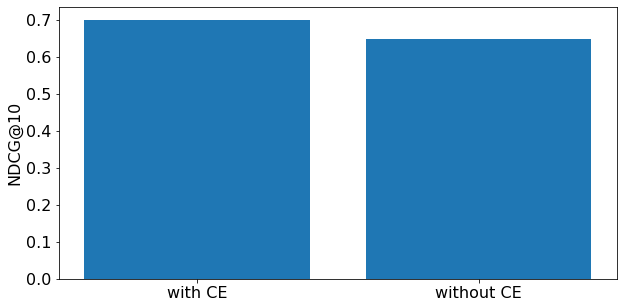

In [30]:
plot_performance(["without CE", "with CE"], [0.64816, 0.69919], figsize=(10, 5))

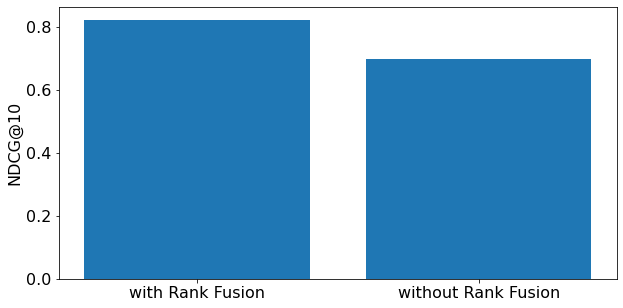

In [31]:
plot_performance(["with Rank Fusion", "without Rank Fusion"], [0.82159, 0.69919], figsize=(10, 5))

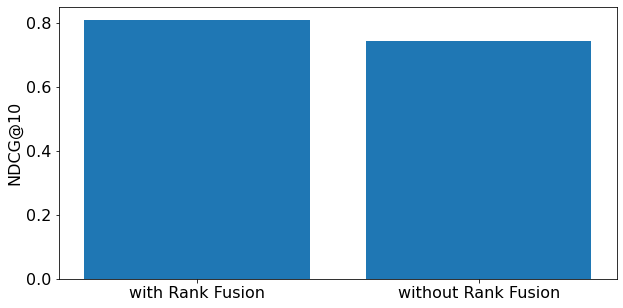

In [32]:
plot_performance(["with Rank Fusion", "without Rank Fusion"], [0.81026, 0.74384], figsize=(10, 5))

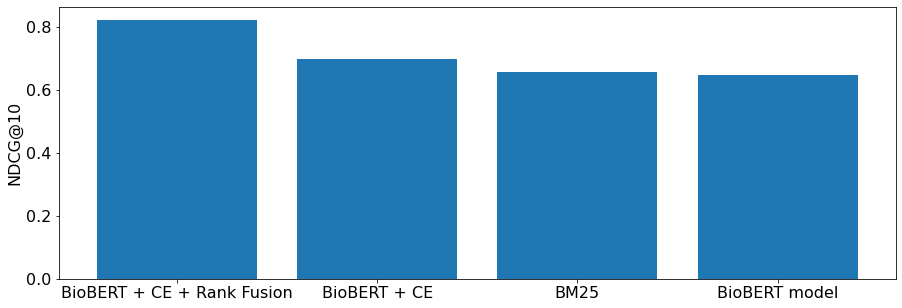

In [33]:
plot_performance(["BM25", "BioBERT model", "BioBERT + CE", "BioBERT + CE + Rank Fusion"], [0.6559, 0.64816, 0.69919, 0.82159])